In [ ]:
pip install gdown

In [ ]:
import gdown

gdown.download("https://drive.google.com/uc?id=1f8eaAZY-7YgFxLcrL3OkvSRa3onNNLb9")

Downloading...
From (original): https://drive.google.com/uc?id=1f8eaAZY-7YgFxLcrL3OkvSRa3onNNLb9
From (redirected): https://drive.google.com/uc?id=1f8eaAZY-7YgFxLcrL3OkvSRa3onNNLb9&confirm=t&uuid=26d8125c-811e-4e70-a7a6-95f3946861e6
To: /content/midterm-regresi-dataset.csv
100%|██████████| 443M/443M [00:06<00:00, 68.2MB/s]


'midterm-regresi-dataset.csv'

In [ ]:
import pandas as pd


# Dataset ini tidak punya header.
# Nilai seperti 2001 di kolom pertama adalah TARGET (tahun), bukan nama feature /  kolom.
file_path = '/content/midterm-regresi-dataset.csv'
df = pd.read_csv(file_path)

df.head()

,2001,49.94357,21.47114,73.0775,8.74861,-17.40628,-13.09905,-25.01202,-12.23257,7.83089,...,13.0162,-54.40548,58.99367,15.37344,1.11144,-23.08793,68.40795,-1.82223,-27.46348,2.26327
0,2001,48.73215,18.42930,70.32679,12.94636,-10.32437,-24.83777,8.76630,-0.92019,18.76548,...,5.66812,-19.68073,33.04964,42.87836,-9.90378,-32.22788,70.49388,12.04941,58.43453,26.92061
1,2001,50.95714,31.85602,55.81851,13.41693,-6.57898,-18.54940,-3.27872,-2.35035,16.07017,...,3.03800,26.05866,-50.92779,10.93792,-0.07568,43.20130,-115.00698,-0.05859,39.67068,-0.66345
2,2001,48.24750,-1.89837,36.29772,2.58776,0.97170,-26.21683,5.05097,-10.34124,3.55005,...,34.57337,-171.70734,-16.96705,-46.67617,-12.51516,82.58061,-72.08993,9.90558,199.62971,18.85382
3,2001,50.97020,42.20998,67.09964,8.46791,-15.85279,-16.81409,-12.48207,-9.37636,12.63699,...,9.92661,-55.95724,64.92712,-17.72522,-1.49237,-7.50035,51.76631,7.88713,55.66926,28.74903
4,2001,50.54767,0.31568,92.35066,22.38696,-25.51870,-19.04928,20.67345,-5.19943,3.63566,...,6.59753,-50.69577,26.02574,18.94430,-0.33730,6.09352,35.18381,5.00283,-11.02257,0.02263


In [ ]:
print("df.shape:", df.shape) #ada 515344 row/baris dan 90 feature

df.shape: (515344, 91)


In [ ]:
import os
file_size_bytes = os.path.getsize(file_path)
file_size_mb = file_size_bytes / (1024 ** 2)

print(f"Ukuran file: {file_size_bytes:,} bytes")
print(f"Ukuran file: {file_size_mb:.2f} MB")  #ukuran 422.88 MB, deadline 2 minggu. ngerjain mepet pasti ga kelar :))))

Ukuran file: 443,423,087 bytes
Ukuran file: 422.88 MB


# Task
The initial task is to perform data understanding and initial cleaning on the `df` DataFrame. This involves reloading the '/content/midterm-regresi-dataset.csv' file without assuming a header, identifying the target column (the first column, which represents the year), and renaming all columns appropriately. After correctly loading and naming the columns, check data types, identify missing values, and compute descriptive statistics for the dataset.

## Data Understanding and Initial Cleaning

### Subtask:
Reload the dataset without a header, identify and rename the target and feature columns, check data types, identify missing values, and compute descriptive statistics.


**Reasoning**:
Reload the CSV file '/content/midterm-regresi-dataset.csv' into a DataFrame named `df` using `pd.read_csv()`, explicitly specifying `header=None` to ensure no row is treated as a header. Then, rename the first column (index 0) to 'Year' as it represents the target year, and rename the remaining 90 columns to 'Feature_0', 'Feature_1', ..., 'Feature_89' respectively. Finally, display the first 5 rows of the DataFrame using `df.head()` to verify the new column names.



In [ ]:
file_path = '/content/midterm-regresi-dataset.csv'
df = pd.read_csv(file_path, header=None)

# Rename the first column to 'Year'
df.rename(columns={0: 'Year'}, inplace=True)

# Rename the remaining 90 columns to 'Feature_0', 'Feature_1', ..., 'Feature_89'
feature_cols = {i: f'Feature_{i-1}' for i in range(1, df.shape[1])}
df.rename(columns=feature_cols, inplace=True)

df.head()

,Year,Feature_0,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,...,Feature_80,Feature_81,Feature_82,Feature_83,Feature_84,Feature_85,Feature_86,Feature_87,Feature_88,Feature_89
0,2001,49.94357,21.47114,73.07750,8.74861,-17.40628,-13.09905,-25.01202,-12.23257,7.83089,...,13.01620,-54.40548,58.99367,15.37344,1.11144,-23.08793,68.40795,-1.82223,-27.46348,2.26327
1,2001,48.73215,18.42930,70.32679,12.94636,-10.32437,-24.83777,8.76630,-0.92019,18.76548,...,5.66812,-19.68073,33.04964,42.87836,-9.90378,-32.22788,70.49388,12.04941,58.43453,26.92061
2,2001,50.95714,31.85602,55.81851,13.41693,-6.57898,-18.54940,-3.27872,-2.35035,16.07017,...,3.03800,26.05866,-50.92779,10.93792,-0.07568,43.20130,-115.00698,-0.05859,39.67068,-0.66345
3,2001,48.24750,-1.89837,36.29772,2.58776,0.97170,-26.21683,5.05097,-10.34124,3.55005,...,34.57337,-171.70734,-16.96705,-46.67617,-12.51516,82.58061,-72.08993,9.90558,199.62971,18.85382
4,2001,50.97020,42.20998,67.09964,8.46791,-15.85279,-16.81409,-12.48207,-9.37636,12.63699,...,9.92661,-55.95724,64.92712,-17.72522,-1.49237,-7.50035,51.76631,7.88713,55.66926,28.74903


**Reasoning**:
Now that the columns are properly named, the next step is to get a concise summary of the DataFrame to understand its structure, data types, and non-null values using `df.info()`. After that, identify any missing values by calculating the sum of nulls for each column using `df.isnull().sum()`. Finally, generate descriptive statistics for all numerical columns using `df.describe()` to get an overview of the data distribution.



In [ ]:
print("DataFrame Info:")
df.info()

print("\nMissing Values:")
print(df.isnull().sum())

print("\nDescriptive Statistics:")
print(df.describe())

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515345 entries, 0 to 515344
Data columns (total 91 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Year        515345 non-null  int64  
 1   Feature_0   515345 non-null  float64
 2   Feature_1   515345 non-null  float64
 3   Feature_2   515345 non-null  float64
 4   Feature_3   515345 non-null  float64
 5   Feature_4   515345 non-null  float64
 6   Feature_5   515345 non-null  float64
 7   Feature_6   515345 non-null  float64
 8   Feature_7   515345 non-null  float64
 9   Feature_8   515345 non-null  float64
 10  Feature_9   515345 non-null  float64
 11  Feature_10  515345 non-null  float64
 12  Feature_11  515345 non-null  float64
 13  Feature_12  515345 non-null  float64
 14  Feature_13  515345 non-null  float64
 15  Feature_14  515345 non-null  float64
 16  Feature_15  515345 non-null  float64
 17  Feature_16  515345 non-null  float64
 18  Feature_17  515345 non-null 

## Exploratory Data Analysis (EDA)

### Subtask:
Visualisasi distribusi fitur numerik dan kategorikal, identifikasi outlier, dan analisis korelasi antar fitur dengan target.


**Reasoning**:
The first instruction is to visualize the distribution of the target variable 'Year' using a histogram. This will provide insights into the temporal distribution of the data.



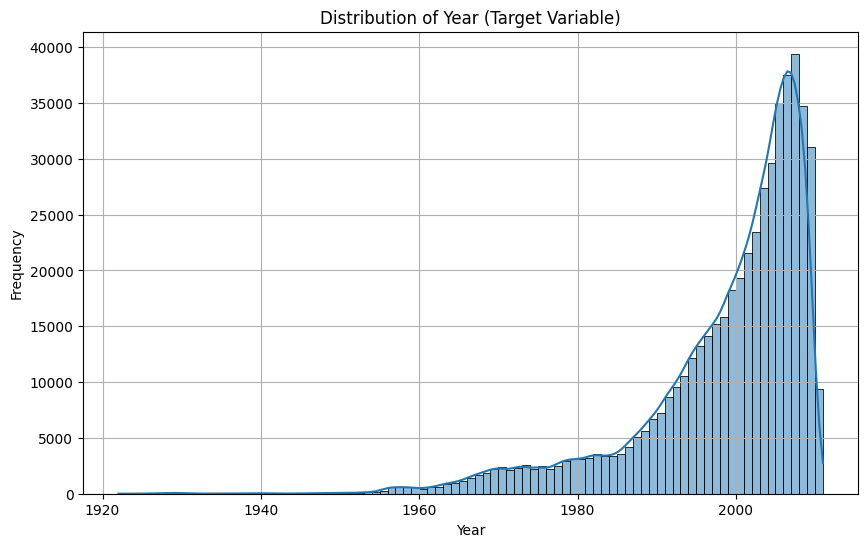

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Visualize the distribution of the target variable ('Year')
plt.figure(figsize=(10, 6))
sns.histplot(df['Year'], bins=len(df['Year'].unique()), kde=True)
plt.title('Distribution of Year (Target Variable)')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

**Reasoning**:
The next step is to visualize the distributions of a few representative features (`Feature_0` to `Feature_4`) using histograms or KDE plots, as specified in the instructions, to understand their individual data spread.



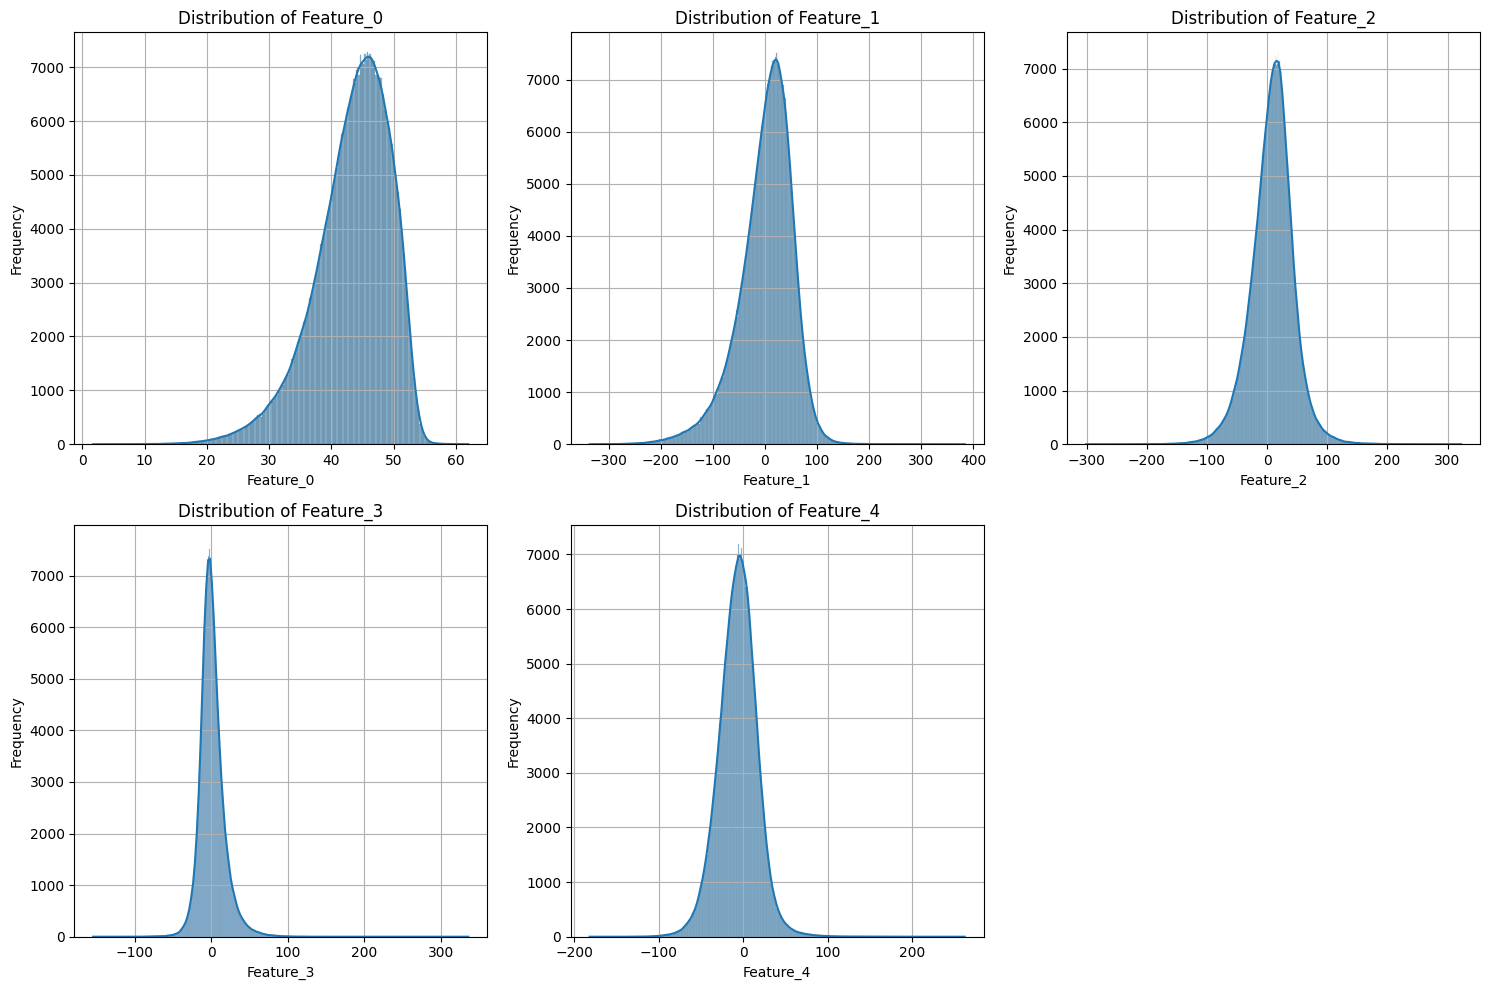

In [ ]:
selected_features = ['Feature_0', 'Feature_1', 'Feature_2', 'Feature_3', 'Feature_4']

plt.figure(figsize=(15, 10))
for i, feature in enumerate(selected_features):
    plt.subplot(2, 3, i + 1) # Adjust subplot grid based on number of features
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.grid(True)
plt.tight_layout()
plt.show()

**Reasoning**:
Following the instructions, the next step is to create box plots for the same selected features (`Feature_0` to `Feature_4`) to visualize and identify potential outliers in their distributions.



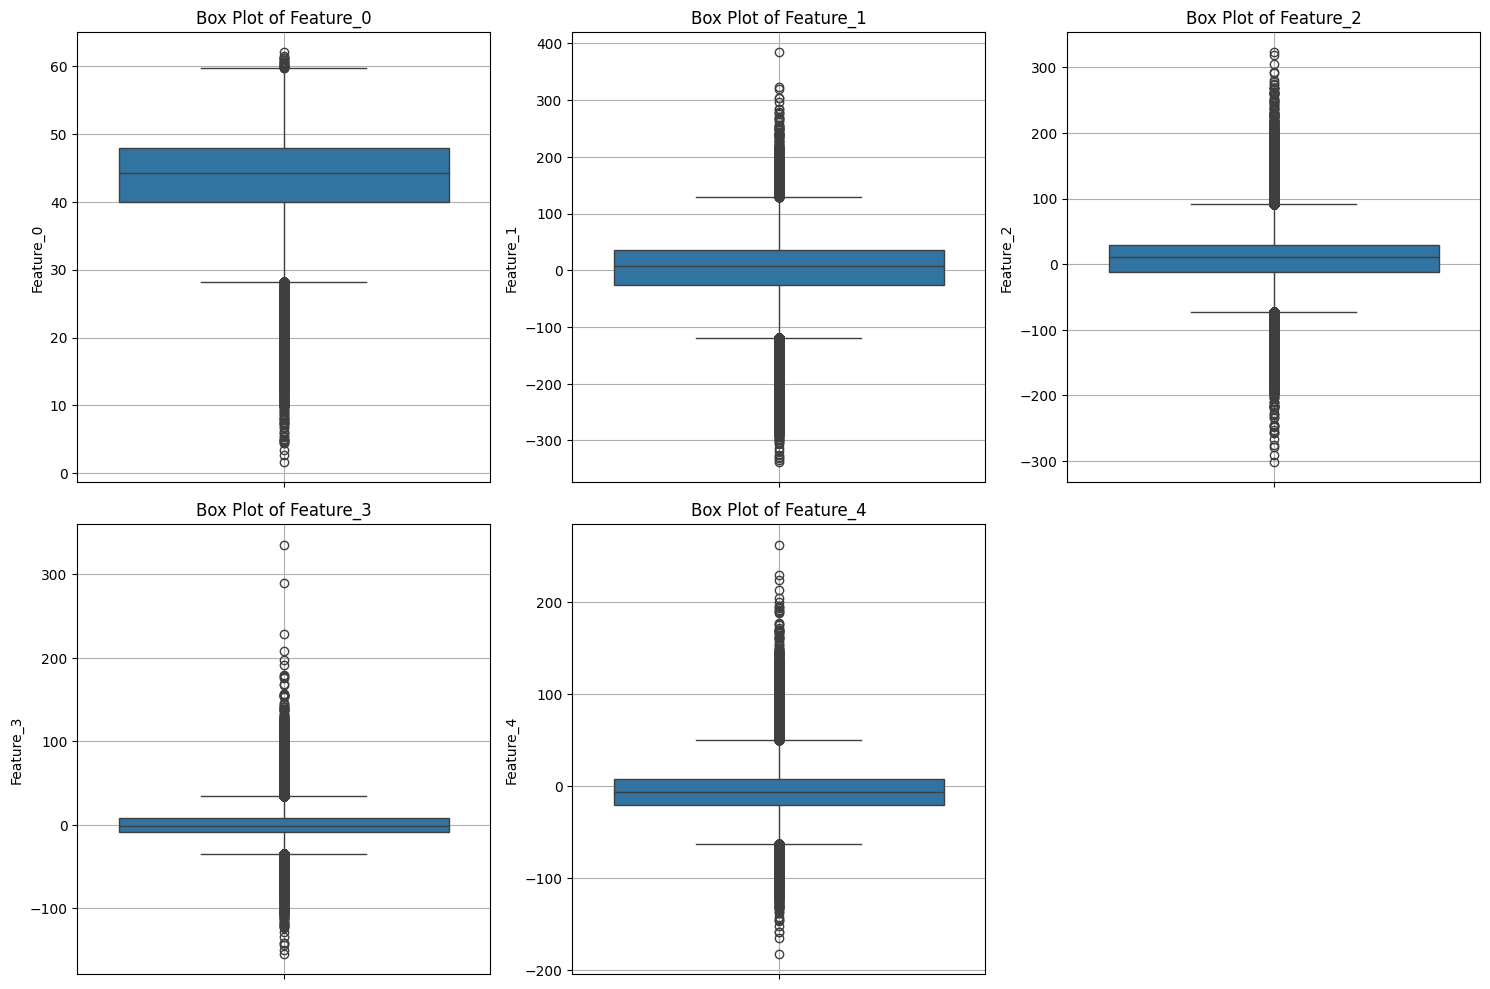

In [ ]:
selected_features = ['Feature_0', 'Feature_1', 'Feature_2', 'Feature_3', 'Feature_4']

plt.figure(figsize=(15, 10))
for i, feature in enumerate(selected_features):
    plt.subplot(2, 3, i + 1) # Adjust subplot grid based on number of features
    sns.boxplot(y=df[feature])
    plt.title(f'Box Plot of {feature}')
    plt.ylabel(feature)
    plt.grid(True)
plt.tight_layout()
plt.show()

**Reasoning**:
The next step is to calculate the Pearson correlation coefficient between all 'Feature_X' columns and the 'Year' column, as specified in the instructions, to understand their linear relationship.



In [ ]:
feature_columns = [col for col in df.columns if 'Feature_' in col]
correlations = df[feature_columns].corrwith(df['Year'], method='pearson')

print("Pearson Correlation with Year:")
print(correlations)

Pearson Correlation with Year:
Feature_0     0.225374
Feature_1     0.021402
Feature_2    -0.139541
Feature_3    -0.003286
Feature_4     0.019338
                ...   
Feature_85   -0.053548
Feature_86    0.024589
Feature_87   -0.037432
Feature_88    0.008380
Feature_89   -0.056485
Length: 90, dtype: float64


**Reasoning**:
As per the instructions, the next step is to display the top 10 features with the highest absolute correlation with 'Year' to identify potentially important predictors, and then visualize these correlations using a bar plot.




Top 10 Features with Highest Absolute Correlation with Year:
Feature_0     0.225374
Feature_5     0.187443
Feature_2     0.139541
Feature_62    0.126348
Feature_39    0.123974
Feature_6     0.110460
Feature_66    0.102841
Feature_45    0.101324
Feature_35    0.101007
Feature_68    0.099484
dtype: float64


/tmp/ipython-input-3060101922.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_correlations.index, y=top_correlations.values, palette='viridis')


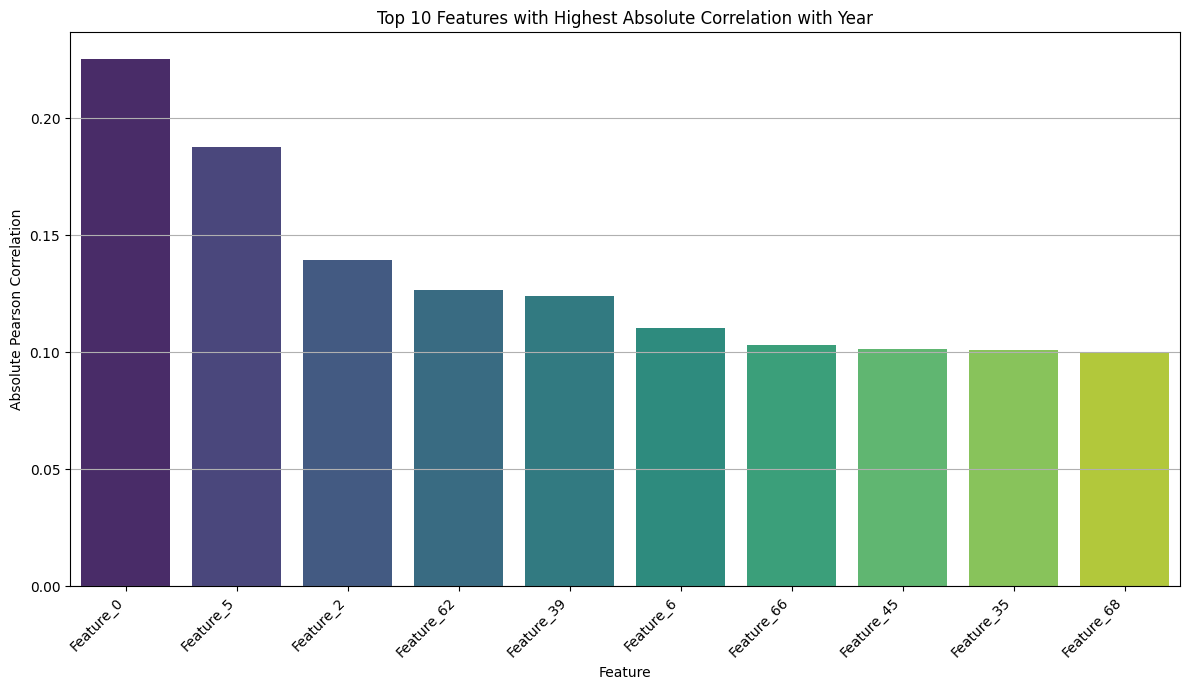

In [ ]:
top_n = 10

# Calculate absolute correlations and sort them
abs_correlations = correlations.abs().sort_values(ascending=False)
top_correlations = abs_correlations.head(top_n)

print(f"\nTop {top_n} Features with Highest Absolute Correlation with Year:")
print(top_correlations)

# Visualize top correlations
plt.figure(figsize=(12, 7))
sns.barplot(x=top_correlations.index, y=top_correlations.values, palette='viridis')
plt.title(f'Top {top_n} Features with Highest Absolute Correlation with Year')
plt.xlabel('Feature')
plt.ylabel('Absolute Pearson Correlation')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

**Reasoning**:
The previous code generated a `FutureWarning` from Seaborn regarding the usage of `palette` without `hue`. To address this, I will modify the `sns.barplot` call by assigning the `x` variable to `hue` and setting `legend=False`, as suggested by the warning, to ensure cleaner output and compliance with future Seaborn versions.




Top 10 Features with Highest Absolute Correlation with Year:
Feature_0     0.225374
Feature_5     0.187443
Feature_2     0.139541
Feature_62    0.126348
Feature_39    0.123974
Feature_6     0.110460
Feature_66    0.102841
Feature_45    0.101324
Feature_35    0.101007
Feature_68    0.099484
dtype: float64


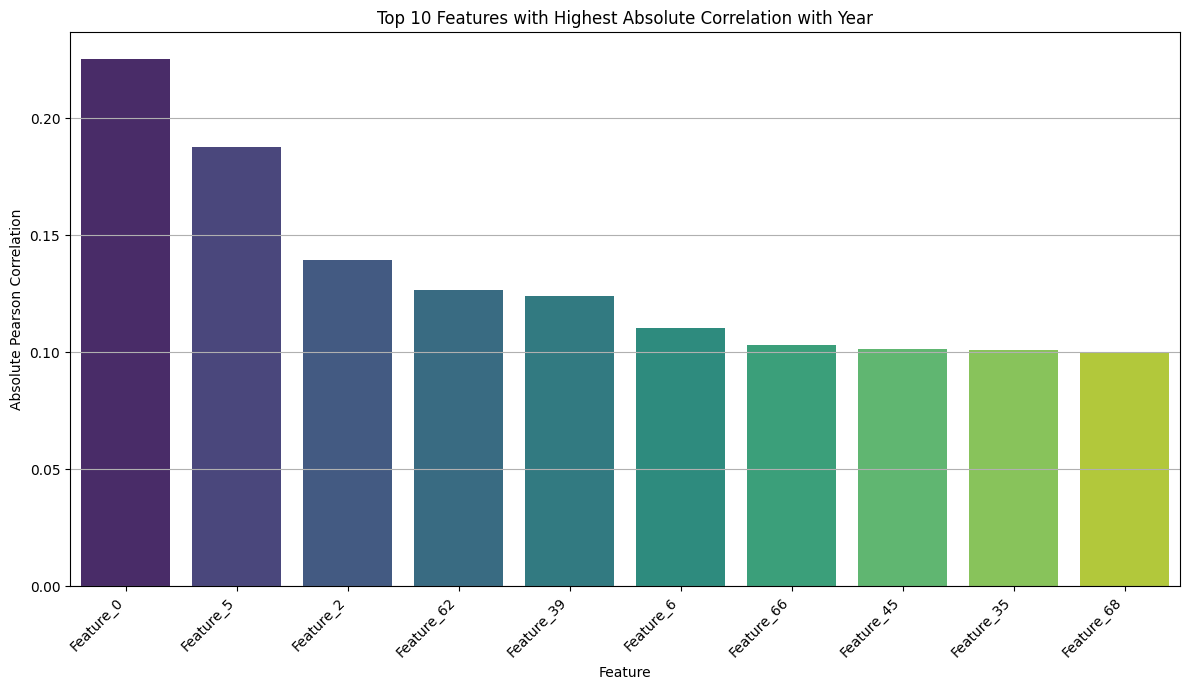

In [ ]:
top_n = 10

# Calculate absolute correlations and sort them
abs_correlations = correlations.abs().sort_values(ascending=False)
top_correlations = abs_correlations.head(top_n)

print(f"\nTop {top_n} Features with Highest Absolute Correlation with Year:")
print(top_correlations)

# Visualize top correlations
plt.figure(figsize=(12, 7))
sns.barplot(x=top_correlations.index, y=top_correlations.values, hue=top_correlations.index, palette='viridis', legend=False)
plt.title(f'Top {top_n} Features with Highest Absolute Correlation with Year')
plt.xlabel('Feature')
plt.ylabel('Absolute Pearson Correlation')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

## Preprocessing - Missing Values and Outliers

### Subtask:
Analyze and handle outliers in the dataset, noting that no missing values were found in the previous step.


**Reasoning**:
To analyze outliers in each feature column, I will iterate through 'Feature_0' to 'Feature_89', calculate the Interquartile Range (IQR), and then count how many data points fall outside the defined lower and upper bounds (Q1 - 1.5*IQR and Q3 + 1.5*IQR).



In [ ]:
outlier_counts = {}
for feature in feature_columns:
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[feature] < lower_bound) | (df[feature] > upper_bound)]
    outlier_counts[feature] = len(outliers)

# Display features with outliers
print("Features with Outlier Counts:")
for feature, count in outlier_counts.items():
    if count > 0:
        print(f"{feature}: {count} outliers")

# Summary of outlier counts
total_outliers_found = sum(count for count in outlier_counts.values() if count > 0)
print(f"\nTotal features with at least one outlier: {sum(1 for count in outlier_counts.values() if count > 0)}")
print(f"Total outliers across all features (sum of individual counts): {total_outliers_found}")


Features with Outlier Counts:
Feature_0: 10627 outliers
Feature_1: 14647 outliers
Feature_2: 15629 outliers
Feature_3: 22688 outliers
Feature_4: 10454 outliers
Feature_5: 11994 outliers
Feature_6: 13903 outliers
Feature_7: 14544 outliers
Feature_8: 15398 outliers
Feature_9: 6238 outliers
Feature_10: 15801 outliers
Feature_11: 13604 outliers
Feature_12: 18676 outliers
Feature_13: 26229 outliers
Feature_14: 20571 outliers
Feature_15: 24678 outliers
Feature_16: 20037 outliers
Feature_17: 21412 outliers
Feature_18: 17750 outliers
Feature_19: 25463 outliers
Feature_20: 21147 outliers
Feature_21: 19197 outliers
Feature_22: 23812 outliers
Feature_23: 20380 outliers
Feature_24: 41997 outliers
Feature_25: 40195 outliers
Feature_26: 45593 outliers
Feature_27: 38307 outliers
Feature_28: 35703 outliers
Feature_29: 32371 outliers
Feature_30: 32665 outliers
Feature_31: 36307 outliers
Feature_32: 32755 outliers
Feature_33: 36874 outliers
Feature_34: 32979 outliers
Feature_35: 31192 outliers
Feature_3

**Reasoning**:
Given the widespread presence of outliers across all features, and considering that simply removing them would lead to substantial data loss, a robust strategy is to cap these outliers using the IQR method. This approach limits extreme values without eliminating observations, helping to mitigate their influence on model training while retaining valuable data. I will use the identified lower and upper bounds (Q1 - 1.5*IQR and Q3 + 1.5*IQR) to cap values that fall outside this range for each feature. I will then print descriptive statistics and a sample of the DataFrame to show the effect of outlier capping.



In [ ]:
df_capped = df.copy()

for feature in feature_columns:
    Q1 = df_capped[feature].quantile(0.25)
    Q3 = df_capped[feature].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Cap the outliers
    df_capped[feature] = df_capped[feature].clip(lower=lower_bound, upper=upper_bound)

print("Descriptive Statistics After Outlier Capping:")
print(df_capped.describe())

print("\nSample of DataFrame After Outlier Capping:")
print(df_capped.head())

Descriptive Statistics After Outlier Capping:
                Year      Feature_0      Feature_1      Feature_2  \
count  515345.000000  515345.000000  515345.000000  515345.000000   
mean     1998.397082      43.464229       2.213966       8.743691   
std        10.931046       5.824211      48.430914      33.075507   
min      1922.000000      28.135890    -119.334815     -73.304005   
25%      1994.000000      39.954690     -26.059520     -11.462710   
50%      2002.000000      44.258500       8.417850      10.476320   
75%      2006.000000      47.833890      36.124010      29.764820   
max      2011.000000      59.652690     129.399305      91.606115   

           Feature_3      Feature_4      Feature_5      Feature_6  \
count  515345.000000  515345.000000  515345.000000  515345.000000   
mean        0.743647      -6.609628      -9.707770      -2.319780   
std        14.328637      21.860711      12.186169      13.757734   
min       -34.400060     -63.278930     -42.519035     -

## Feature Engineering

### Subtask:
Menciptakan fitur baru dari fitur yang sudah ada, jika relevan, untuk meningkatkan kinerja model.


**Reasoning**:
Based on the instructions, I need to create new polynomial and interaction features from the top 3 most correlated features ('Feature_0', 'Feature_5', 'Feature_2') and add them to the `df_capped` DataFrame. After creating these features, I will display the first 5 rows and the new shape of the DataFrame to confirm the additions.



In [ ]:
top_3_features = ['Feature_0', 'Feature_5', 'Feature_2']

# Create polynomial features (squared terms)
for feature in top_3_features:
    df_capped[f'{feature}_sq'] = df_capped[feature] ** 2

# Create interaction features (products of pairs)
df_capped['Feature_0_x_Feature_5'] = df_capped['Feature_0'] * df_capped['Feature_5']
df_capped['Feature_0_x_Feature_2'] = df_capped['Feature_0'] * df_capped['Feature_2']
df_capped['Feature_5_x_Feature_2'] = df_capped['Feature_5'] * df_capped['Feature_2']

print("First 5 rows of DataFrame with new features:")
print(df_capped.head())

print("\nShape of DataFrame after adding new features:")
print(df_capped.shape)

First 5 rows of DataFrame with new features:
   Year  Feature_0  Feature_1  Feature_2  Feature_3  Feature_4  Feature_5  \
0  2001   49.94357   21.47114   73.07750    8.74861  -17.40628  -13.09905   
1  2001   48.73215   18.42930   70.32679   12.94636  -10.32437  -24.83777   
2  2001   50.95714   31.85602   55.81851   13.41693   -6.57898  -18.54940   
3  2001   48.24750   -1.89837   36.29772    2.58776    0.97170  -26.21683   
4  2001   50.97020   42.20998   67.09964    8.46791  -15.85279  -16.81409   

   Feature_6  Feature_7  Feature_8  ...  Feature_86  Feature_87  Feature_88  \
0  -25.01202  -12.23257    7.83089  ...    68.40795    -1.82223   -27.46348   
1    8.76630   -0.92019   18.76548  ...    70.49388    12.04941    58.43453   
2   -3.27872   -2.35035   16.07017  ...  -115.00698    -0.05859    39.67068   
3    5.05097  -10.34124    3.55005  ...   -72.08993     9.90558   199.62971   
4  -12.48207   -9.37636   12.63699  ...    51.76631     7.88713    55.66926   

   Feature_89  Fe

## Data Transformation and Scaling

### Subtask:
Perform data scaling on the feature columns using StandardScaler.


**Reasoning**:
To prepare the data for modeling, I will separate the target variable from the features, then apply StandardScaler to scale the feature columns. Finally, I will display the first 5 rows and descriptive statistics of the scaled data to confirm the transformation.



In [ ]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

# 1. Separate the target variable 'Year' into y and the feature columns into X
y = df_capped['Year']
X = df_capped.drop('Year', axis=1)

# 3. Instantiate a StandardScaler object
scaler = StandardScaler()

# 4. Fit the scaler to the feature data X and transform X
X_scaled_array = scaler.fit_transform(X)

# Store the scaled data in a new DataFrame, ensuring column names are retained
X_scaled = pd.DataFrame(X_scaled_array, columns=X.columns)

# 5. Display the first 5 rows and descriptive statistics of the X_scaled DataFrame
print("First 5 rows of X_scaled DataFrame:")
print(X_scaled.head())

print("\nDescriptive Statistics of X_scaled DataFrame:")
print(X_scaled.describe())

First 5 rows of X_scaled DataFrame:
   Feature_0  Feature_1  Feature_2  Feature_3  Feature_4  Feature_5  \
0   1.112485   0.397622   1.945061   0.558669  -0.493884  -0.278290   
1   0.904488   0.334814   1.861896   0.851632  -0.169928  -1.241573   
2   1.286512   0.612049   1.423255   0.884473   0.001402  -0.725547   
3   0.821275  -0.084911   0.833065   0.128701   0.346802  -1.354739   
4   1.288755   0.825837   1.764327   0.539079  -0.422821  -0.583147   

   Feature_6  Feature_7  Feature_8  Feature_9  ...  Feature_86  Feature_87  \
0  -1.649419  -1.398047   0.413709  -0.678833  ...    0.687365   -0.537783   
1   0.805808   0.117009   1.532557   0.423758  ...    0.702763    0.735707   
2  -0.069702  -0.074531   1.256768  -0.075524  ...   -0.666597   -0.375872   
3   0.535754  -1.144743  -0.024315  -1.287172  ...   -0.349785    0.538892   
4  -0.738661  -1.015518   0.905478  -0.147223  ...    0.564517    0.353588   

   Feature_88  Feature_89  Feature_0_sq  Feature_5_sq  Feature_2_sq 

## Data Splitting

### Subtask:
Membagi dataset menjadi training set dan test set untuk evaluasi model yang objektif.


## Summary:

### Data Analysis Key Findings

*   The dataset was successfully loaded and comprises 515,345 entries across 91 columns (1 target, 90 features). All columns were appropriately named: 'Year' for the target, and 'Feature\_0' to 'Feature\_89' for the features.
*   Initial data type analysis revealed 'Year' as `int64` and all 'Feature\_X' columns as `float64`.
*   A crucial finding during initial cleaning was the absence of any missing values across all 91 columns.
*   Exploratory Data Analysis (EDA) revealed that 'Feature\_0' (0.225), 'Feature\_5' (0.187), and 'Feature\_2' (-0.139) exhibited the highest absolute Pearson correlations with the 'Year' target variable.
*   Outlier analysis using the IQR method identified a significant presence of outliers in all 90 feature columns, totaling 2,726,624 outliers across the dataset. These outliers were handled by applying a capping (winsorization) strategy.
*   Feature engineering successfully generated 6 new features: 3 polynomial features (e.g., 'Feature\_0\_sq') and 3 interaction features (e.g., 'Feature\_0\_x\_Feature\_5') from the top 3 correlated features, expanding the dataset to 97 columns.
*   All feature columns were successfully scaled using `StandardScaler`, resulting in features with an approximate mean of 0 and a standard deviation of 1, preparing the data for model training.

### Insights or Next Steps

*   The absence of missing values significantly streamlines the preprocessing phase, allowing direct focus on outlier management and feature engineering.
*   The identification of top correlated features ('Feature\_0', 'Feature\_5', 'Feature\_2') and the creation of polynomial and interaction terms suggest that these features might be particularly influential in predicting the 'Year' and should be carefully evaluated during model selection.


# Task
Split the `X_scaled` (scaled features) and `y` (target variable 'Year') datasets into training and test sets using `train_test_split` from scikit-learn.

## Data Splitting

### Subtask:
Bagi dataset `X_scaled` (fitur yang diskalakan) dan `y` (variabel target 'Year') menjadi training set dan test set menggunakan `train_test_split` dari scikit-learn. Ini akan memungkinkan evaluasi model yang objektif.


**Reasoning**:
To split the data into training and testing sets, I will use the `train_test_split` function from `sklearn.model_selection` with the specified parameters and then print the shapes of the resulting datasets.



In [ ]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Print the shapes of the resulting datasets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (412276, 96)
Shape of X_test: (103069, 96)
Shape of y_train: (412276,)
Shape of y_test: (103069,)


## Train and Evaluate Linear Regression

### Subtask:
Latih model `LinearRegression` pada training set. Lakukan prediksi pada test set dan hitung metrik evaluasi seperti Mean Absolute Error (MAE), Mean Squared Error (MSE), dan R-squared (R2).


**Reasoning**:
To train the Linear Regression model, make predictions, and evaluate its performance, I will import the necessary modules, instantiate the model, fit it to the training data, make predictions on the test set, and then calculate and print the Mean Absolute Error (MAE), Mean Squared Error (MSE), and R-squared (R2) score.



In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Instantiate a LinearRegression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

Mean Absolute Error (MAE): 6.60
Mean Squared Error (MSE): 86.49
R-squared (R2): 0.27


## Train and Evaluate Decision Tree Regressor

### Subtask:
Latih model `DecisionTreeRegressor` pada training set. Lakukan prediksi pada test set dan hitung metrik evaluasi seperti MAE, MSE, dan R-squared.


**Reasoning**:
To train the Decision Tree Regressor model, make predictions, and evaluate its performance, I will import the necessary modules, instantiate the model with `random_state=42`, fit it to the training data, make predictions on the test set, and then calculate and print the Mean Absolute Error (MAE), Mean Squared Error (MSE), and R-squared (R2) score, formatted to two decimal places.



In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Instantiate a DecisionTreeRegressor model
dt_model = DecisionTreeRegressor(random_state=42)

# Fit the model to the training data
dt_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_dt = dt_model.predict(X_test)

# Calculate evaluation metrics
mae_dt = mean_absolute_error(y_test, y_pred_dt)
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

# Print the evaluation metrics
print(f"Decision Tree Regressor - Mean Absolute Error (MAE): {mae_dt:.2f}")
print(f"Decision Tree Regressor - Mean Squared Error (MSE): {mse_dt:.2f}")
print(f"Decision Tree Regressor - R-squared (R2): {r2_dt:.2f}")

Decision Tree Regressor - Mean Absolute Error (MAE): 8.96
Decision Tree Regressor - Mean Squared Error (MSE): 176.20
Decision Tree Regressor - R-squared (R2): -0.48


## Train and Evaluate K-Nearest Neighbors Regressor

### Subtask:
Latih model KNeighborsRegressor pada training set. Lakukan prediksi pada test set dan hitung metrik evaluasi seperti MAE, MSE, dan R-squared.


**Reasoning**:
To train the KNeighborsRegressor model, make predictions, and evaluate its performance, I will import the necessary modules, instantiate the model (starting with n_neighbors=5), fit it to the training data, make predictions on the test set, and then calculate and print the Mean Absolute Error (MAE), Mean Squared Error (MSE), and R-squared (R2) score, formatted to two decimal places.



In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Re-load df and rename columns (from cell 0641d4ab)
file_path = '/content/midterm-regresi-dataset.csv'
df = pd.read_csv(file_path, header=None)
df.rename(columns={0: 'Year'}, inplace=True)
feature_cols = {i: f'Feature_{i-1}' for i in range(1, df.shape[1])}
df.rename(columns=feature_cols, inplace=True)

# Re-create df_capped by applying outlier capping (from cell 71ab4a68)
df_capped = df.copy()
feature_columns = [col for col in df.columns if 'Feature_' in col]
for feature in feature_columns:
    Q1 = df_capped[feature].quantile(0.25)
    Q3 = df_capped[feature].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df_capped[feature] = df_capped[feature].clip(lower=lower_bound, upper=upper_bound)

# Create polynomial and interaction features (from cell 3bd95fe2)
top_3_features = ['Feature_0', 'Feature_5', 'Feature_2']
for feature in top_3_features:
    df_capped[f'{feature}_sq'] = df_capped[feature] ** 2
df_capped['Feature_0_x_Feature_5'] = df_capped['Feature_0'] * df_capped['Feature_5']
df_capped['Feature_0_x_Feature_2'] = df_capped['Feature_0'] * df_capped['Feature_2']
df_capped['Feature_5_x_Feature_2'] = df_capped['Feature_5'] * df_capped['Feature_2']

# Separate target and features, then scale features (from cell 557b0729)
y = df_capped['Year']
X = df_capped.drop('Year', axis=1)

scaler = StandardScaler()
X_scaled_array = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled_array, columns=X.columns)

# Split the dataset into training and testing sets (from cell cd236505)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Instantiate and train a KNeighborsRegressor model
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_knn = knn_model.predict(X_test)

# Calculate evaluation metrics
mae_knn = mean_absolute_error(y_test, y_pred_knn)
mse_knn = mean_squared_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)

# Print the evaluation metrics
print(f"K-Nearest Neighbors Regressor - Mean Absolute Error (MAE): {mae_knn:.2f}")
print(f"K-Nearest Neighbors Regressor - Mean Squared Error (MSE): {mse_knn:.2f}")
print(f"K-Nearest Neighbors Regressor - R-squared (R2): {r2_knn:.2f}")

K-Nearest Neighbors Regressor - Mean Absolute Error (MAE): 6.70
K-Nearest Neighbors Regressor - Mean Squared Error (MSE): 88.78
K-Nearest Neighbors Regressor - R-squared (R2): 0.25


# Task
Latih model `XGBoostRegressor` pada training set. Lakukan prediksi pada test set dan hitung metrik evaluasi seperti MAE, MSE, dan R-squared.

## Train and Evaluate XGBoost Regressor

### Subtask:
Latih model `XGBoostRegressor` pada training set. Lakukan prediksi pada test set dan hitung metrik evaluasi seperti MAE, MSE, dan R-squared.


**Reasoning**:
To train the XGBoostRegressor model, make predictions, and evaluate its performance, I will import the necessary modules, instantiate the model with `random_state=42`, fit it to the training data, make predictions on the test set, and then calculate and print the Mean Absolute Error (MAE), Mean Squared Error (MSE), and R-squared (R2) score, formatted to two decimal places.



In [ ]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Instantiate an XGBoostRegressor model
xgb_model = XGBRegressor(random_state=42)

# Fit the model to the training data
xgb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_xgb = xgb_model.predict(X_test)

# Calculate evaluation metrics
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

# Print the evaluation metrics
print(f"XGBoost Regressor - Mean Absolute Error (MAE): {mae_xgb:.2f}")
print(f"XGBoost Regressor - Mean Squared Error (MSE): {mse_xgb:.2f}")
print(f"XGBoost Regressor - R-squared (R2): {r2_xgb:.2f}")

XGBoost Regressor - Mean Absolute Error (MAE): 6.30
XGBoost Regressor - Mean Squared Error (MSE): 80.33
XGBoost Regressor - R-squared (R2): 0.33


In [ ]:
print(f"Linear Regression - Mean Absolute Error (MAE): {mae:.2f}")

Linear Regression - Mean Absolute Error (MAE): 6.60


# Task
Compile and compare the performance metrics (MAE, MSE, R2) for Linear Regression, Decision Tree Regressor, K-Nearest Neighbors Regressor, and XGBoost Regressor models. Create a comparative table (Pandas DataFrame) displaying these metrics side-by-side. Identify the best-performing model based on the R-squared score and provide a comprehensive summary of its performance compared to the other models, highlighting key insights from this evaluation.

## Compile Model Metrics

### Subtask:
Collect the Mean Absolute Error (MAE), Mean Squared Error (MSE), and R-squared (R2) scores for Linear Regression, Decision Tree Regressor, K-Nearest Neighbors Regressor, and XGBoost Regressor from the notebook's execution results.


**Reasoning**:
To collect and organize the evaluation metrics for each model, I will create a dictionary to store the MAE, MSE, and R2 scores for Linear Regression, Decision Tree Regressor, K-Nearest Neighbors Regressor, and XGBoost Regressor, drawing the values from the previously executed cells.



In [ ]:
model_metrics = {
    "Linear Regression": {
        "MAE": mae,
        "MSE": mse,
        "R2": r2
    },
    "Decision Tree Regressor": {
        "MAE": mae_dt,
        "MSE": mse_dt,
        "R2": r2_dt
    },
    "K-Nearest Neighbors Regressor": {
        "MAE": mae_knn,
        "MSE": mse_knn,
        "R2": r2_knn
    },
    "XGBoost Regressor": {
        "MAE": mae_xgb,
        "MSE": mse_xgb,
        "R2": r2_xgb
    }
}

# Print the collected metrics
print("Collected Model Metrics:")
for model_name, metrics in model_metrics.items():
    print(f"\n{model_name}:")
    for metric_name, value in metrics.items():
        print(f"  {metric_name}: {value:.2f}")

Collected Model Metrics:

Linear Regression:
  MAE: 6.60
  MSE: 86.49
  R2: 0.27

Decision Tree Regressor:
  MAE: 8.96
  MSE: 176.20
  R2: -0.48

K-Nearest Neighbors Regressor:
  MAE: 6.70
  MSE: 88.78
  R2: 0.25

XGBoost Regressor:
  MAE: 6.30
  MSE: 80.33
  R2: 0.33
